In [ ]:
import io
import os
import random
import shutil
import itertools
import numpy as np
import sklearn.metrics
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from datetime import datetime
from shutil import copyfile
from os import getcwd

from google.colab import drive
drive.mount('/content/drive')
print("TensorFlow version: ", tf.__version__)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
TensorFlow version:  2.12.0


#### Making Empty Folder in Drive

In [ ]:
root_dir = '/content/drive/MyDrive/ML/Dataset/FreshNess'

if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

def create_train_val_dirs(root_path):
  train_dir = os.path.join(root_path, 'training')
  validation_dir = os.path.join(root_path, 'validation')


  train_busuk_dir = os.path.join(train_dir, 'busuk')
  train_kurang_segar_dir = os.path.join(train_dir, 'kurang_segar')
  train_segar_dir = os.path.join(train_dir, 'segar')
  os.makedirs(train_busuk_dir)
  os.makedirs(train_kurang_segar_dir)
  os.makedirs(train_segar_dir)

  
  validation_busuk_dir = os.path.join(validation_dir, 'busuk')
  validation_kurang_segar_dir = os.path.join(validation_dir, 'kurang_segar')
  validation_segar_dir = os.path.join(validation_dir, 'segar')
  os.makedirs(validation_busuk_dir)
  os.makedirs(validation_kurang_segar_dir)
  os.makedirs(validation_segar_dir)

try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [ ]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
  files = os.listdir(SOURCE_DIR)

  split = (len(files)*SPLIT_SIZE)

  #Randomize the file sample
  files = random.sample(files, len(files))

  train = files[:int(split)]
    
  
  for name in train:
    source = os.path.join(SOURCE_DIR, name)
    destination = os.path.join(TRAINING_DIR, name)
    if os.path.getsize(source)>0:
      copyfile(source, destination) 
    else:
      print(f"{name} is zero length, so ignoring.")


  valid = files[int(split):]
  
  for name in valid:
    source = os.path.join(SOURCE_DIR, name)
    destination = os.path.join(VALIDATION_DIR, name)
    if os.path.getsize(source)>0:
      copyfile(source, destination) 
    else:
      print(f"{name} is zero length, so ignoring.")

#### Split and add the images

In [ ]:
# Define paths
SEGAR_DIR = "/content/drive/MyDrive/ML/Dataset/Gills (1)/segar"
KURANG_SEGAR_DIR = "/content/drive/MyDrive/ML/Dataset/Gills (1)/kurang-segar"
BUSUK_DIR = "/content/drive/MyDrive/ML/Dataset/Gills (1)/busuk"

TRAINING_DIR = "/content/drive/MyDrive/ML/Dataset/FreshNess/training"
VALIDATION_DIR = "/content/drive/MyDrive/ML/Dataset/FreshNess/validation"

TRAINING_SEGAR_DIR = os.path.join(TRAINING_DIR, "segar/")
VALIDATION_SEGAR_DIR = os.path.join(VALIDATION_DIR, "segar/")
TRAINING_KURANG_SEGAR_DIR = os.path.join(TRAINING_DIR, "kurang_segar/")
VALIDATION_KURANG_SEGAR_DIR = os.path.join(VALIDATION_DIR, "kurang_segar/")

TRAINING_BUSUK_DIR = os.path.join(TRAINING_DIR, "busuk/")
VALIDATION_BUSUK_DIR = os.path.join(VALIDATION_DIR, "busuk/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_SEGAR_DIR)) > 0:
  for file in os.scandir(TRAINING_SEGAR_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_KURANG_SEGAR_DIR)) > 0:
  for file in os.scandir(TRAINING_KURANG_SEGAR_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_BUSUK_DIR)) > 0:
  for file in os.scandir(TRAINING_BUSUK_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_SEGAR_DIR)) > 0:
  for file in os.scandir(VALIDATION_SEGAR_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_KURANG_SEGAR_DIR)) > 0:
  for file in os.scandir(VALIDATION_KURANG_SEGAR_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_BUSUK_DIR)) > 0:
  for file in os.scandir(VALIDATION_BUSUK_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .7

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(SEGAR_DIR, TRAINING_SEGAR_DIR, VALIDATION_SEGAR_DIR, split_size)
split_data(KURANG_SEGAR_DIR, TRAINING_KURANG_SEGAR_DIR, VALIDATION_KURANG_SEGAR_DIR, split_size)
split_data(BUSUK_DIR, TRAINING_BUSUK_DIR, VALIDATION_BUSUK_DIR, split_size)

# Your function should perform copies rather than moving images so original directories should contain unchanged images
print(f"Original fresh directory has {len(os.listdir(SEGAR_DIR))} images")
print(f"Original less_fresh directory has {len(os.listdir(KURANG_SEGAR_DIR))} images")
print(f"Original spoiled directory has {len(os.listdir(BUSUK_DIR))} images\n")

# Training and validation splits. Check that the number of images matches the expected output.
print(f"There are {len(os.listdir(TRAINING_SEGAR_DIR))} images of fresh fish for training")
print(f"There are {len(os.listdir(VALIDATION_SEGAR_DIR))} images of fresh fish for validation")
print(f"There are {len(os.listdir(TRAINING_KURANG_SEGAR_DIR))} images of less fresh fish for training")
print(f"There are {len(os.listdir(VALIDATION_KURANG_SEGAR_DIR))} images of less fresh fish for validation")
print(f"There are {len(os.listdir(TRAINING_BUSUK_DIR))} images of spoiled fish for training")
print(f"There are {len(os.listdir(VALIDATION_BUSUK_DIR))} images of spoiled fish for validation")

Original fresh directory has 50 images
Original less_fresh directory has 50 images
Original spoiled directory has 55 images

There are 35 images of fresh fish for training
There are 15 images of fresh fish for validation
There are 35 images of less fresh fish for training
There are 15 images of less fresh fish for validation
There are 38 images of spoiled fish for training
There are 17 images of spoiled fish for validation


In [ ]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  # Instantiate the ImageDataGenerator class (don't forget to set the arguments to augment the images)
  train_datagen = ImageDataGenerator(rescale=1.0/225,
                                     horizontal_flip=True,
                                     fill_mode="nearest")

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=20,
                                                      class_mode="categorical",
                                                      target_size=(150,150))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale=1.0/225)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=20,
                                                                class_mode="categorical",
                                                                target_size=(150,150))
  return train_generator, validation_generator

In [ ]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 108 images belonging to 3 classes.
Found 47 images belonging to 3 classes.


In [ ]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation=tf.nn.relu,input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get("accuracy")>0.9999 and logs.get("val_accuracy")>0.98):
      print("stop train!")
      self.model.stop_training=True

In [ ]:
callbacks = myCallback()
# Train the model
# Note that this may take some time.
history = model.fit(train_generator,epochs=25,verbose=1,validation_data=validation_generator)

Epoch 1/25
6/6 [==============================] - 6s 888ms/step - loss: 4.1150 - accuracy: 0.3333 - val_loss: 1.4756 - val_accuracy: 0.3191
Epoch 2/25
6/6 [==============================] - 8s 1s/step - loss: 1.0295 - accuracy: 0.4259 - val_loss: 0.9218 - val_accuracy: 0.3617
Epoch 3/25
6/6 [==============================] - 6s 950ms/step - loss: 0.7519 - accuracy: 0.6296 - val_loss: 0.5792 - val_accuracy: 0.8723
Epoch 4/25
6/6 [==============================] - 6s 966ms/step - loss: 0.3466 - accuracy: 0.9444 - val_loss: 0.2714 - val_accuracy: 0.9574
Epoch 5/25
6/6 [==============================] - 5s 822ms/step - loss: 0.1868 - accuracy: 0.9537 - val_loss: 0.1295 - val_accuracy: 0.9574
Epoch 6/25
6/6 [==============================] - 7s 1s/step - loss: 0.0889 - accuracy: 0.9815 - val_loss: 0.1903 - val_accuracy: 0.9574
Epoch 7/25
6/6 [==============================] - 5s 821ms/step - loss: 0.0876 - accuracy: 0.9630 - val_loss: 0.3071 - val_accuracy: 0.9362
Epoch 8/25
6/6 [==========

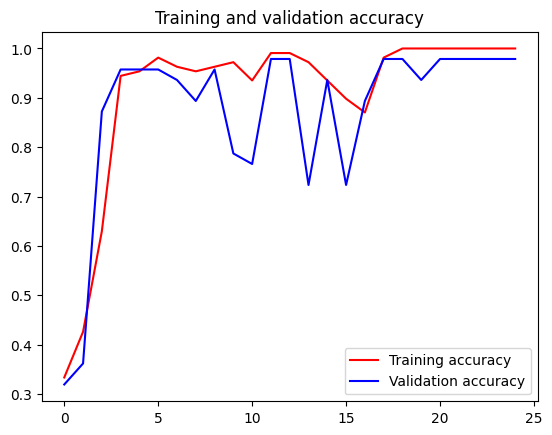

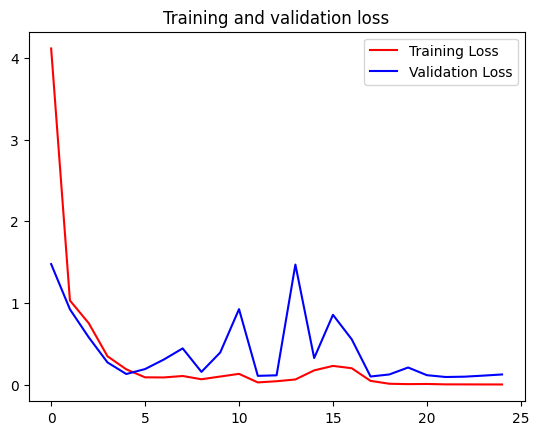

In [ ]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
import numpy as np

from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=load_img(path, target_size=(150, 150))

  x=img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images)

  print(classes)

KeyboardInterrupt: ignored